<a href="https://colab.research.google.com/github/soph1125/Computational-Physics/blob/main/Sophia_Pavia_Lab05_Part2_SHM_Euler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 5, Part 2: Modeling Simple Harmonic Motion with the Euler Method
*Written by Rose Finn*

*Adapted from Giordano & Nakanishi, Chapter 3*

In [ ]:
# import numpy and pyplot
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
%matplotlib inline
import math

## Write a Function to calculate acceleration

(5 points)

Write a function called **acceleration** that does the following:
* Input
  * spring constant, $k$
  * mass, $m$
  * displacement from equilibrium, $dx$

* The function should calculate the acceleration using Hooke's law.  Make sure you correctly account for the direction of the force!

* The function should return acceleration

In [ ]:
# acceleration function here
# write the multi-line comment at the beginning
def acceleration(k,m,dx):
  """
  description: Calculating acceleration using Hooke's Law

  parameters:
  k = spring constant
  m = mass
  dx = displacement from equilibrium
  return: acceleration


  """
  a = (-k/m) * dx

  return a


## Write function to create and initialize position and velocity arrays

(5 points)

Write a function called **initialize** that does the following.
* Input
  * initial position, $x_0$
  * initial velocity, $v_0$
  * total time, $tmax$
  * time step, $dt$

* The function should:
  *  calculate the number of time steps
  ```
  nsteps = int(tmax/dt)
  ```
  * create the time, position and velocity arrays using `np.zeros`
  * set the first value of the position array to $x_0$
  * set the first value of the velocity array to $v_0$

* The function should return
  * time array
  * position array
  * velocity array

In [ ]:
# write your initialize function
# be sure to include your multi-line comment string

def initialize(x0,vx0,tmax,dt):
  """
  description: Initializes time, position, and velocity arrays

  parameters:
  x0 = initial position
  v0 = initial velocity
  tmax = total time
  dt = time step

  return: time array, position array, velocity array
  """
  nsteps = int(tmax/dt)
  time = np.zeros(nsteps)
  position = np.zeros(nsteps)
  velocity = np.zeros(nsteps)

  position[0] = x0
  velocity[0] = vx0

  return time, position, velocity


## Write function to calculate Euler

(5 points)

Write a function called **calculate** that does the following.
* Input
  * time array
  * position array
  * velocity array
  * spring constant, $k$
  * mass, $m$
  * time step, dt

* Optional input argument
  * equilibrium position, $xeq$.  
  * Set the default value to zero.

* The function should calculate the position and velocity as a function of time using the Euler method.

* Return
  * time array
  * position array
  * velocity array

In [ ]:
# write your calculate function here
def calculate(time,position,velocity,k,m,dt):
  """
  description: calculates position and velocity using the Euler method

  parameters:
  time = time array
  position = position array
  velocity = velocity array
  k = spring constant
  m = mass
  dt = time step
  xeq = equlibrium position

  return: time array, position array , velocity array
  """
  omega = np.sqrt(k/m)
  phi = 0.35

  for i in range(1,len(time)):
    position[i] = position[i-1] + velocity[i-1] *dt
    velocity[i] = velocity[i-1] + acceleration(k,m,position[i-1]) * dt
    time[i] = time[i-1] + dt


  return time, position, velocity
  # your code here


In [ ]:
def calculate_pos(A, omega, phi, time):
  position = A* np.cos(omega*time -phi)
  return position

## Write your main program

(5 points)

Follow the instructions in the cell below to model the motion of a mass on a spring.


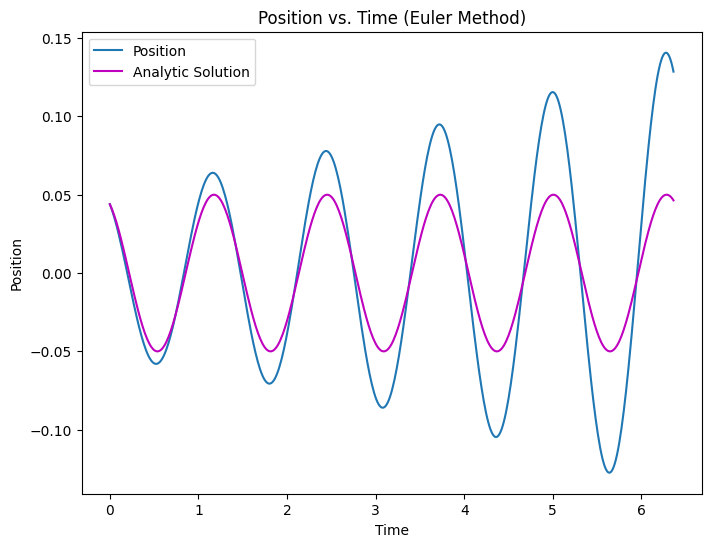

In [ ]:
# define the values for the initial position and velocity
# use the values you determined from Part 1
x0 = 0.044
vx0 = -0.15
# set the amplitude, mass, and spring constant to the values from Part 1
A = 0.05
m = 0.1  # assuming mass is in kg
k = 2.42

# Enter the period you determined from Part 1
T = 1.275
# set the time step to a small fraction of the period
dt = T / 100

# set tmax to 5x the period
tmax = 5 * T

# call initialize
time, position, velocity = initialize(x0, vx0, tmax, dt)

# call calculate
time, pos, vel = calculate(time, position, velocity, k, m, dt)

# plot position versus time
# set the figure size to (8,6)
plt.figure(figsize=(8,6))
plt.plot(time,pos, label = 'Position')
plt.title('Position vs. Time (Euler Method)')
omega = np.sqrt(k/m)
analytical_solution = calculate_pos(A,omega,-0.5,time)
plt.plot(time, analytical_solution, 'm-', label = 'Analytic Solution')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()


# Conservation of Energy

(5 points)


The total mechanical energy of a mass oscillating on a spring is:

$$ E = KE + PE  $$

For a one-dimensional oscillator that is moving only in the x direction, the total energy is:

$$ E = \frac{1}{2}m v_x^2 + \frac{1}{2} k x^2 $$

Make a plot of total energy vs time for your Euler solution.

**Questions**

Briefly answer the following questions in your wiki summary.
1. Does your Euler solution conserve energy?  
1. Is the Euler method a good approach for modeling oscillatory motion?

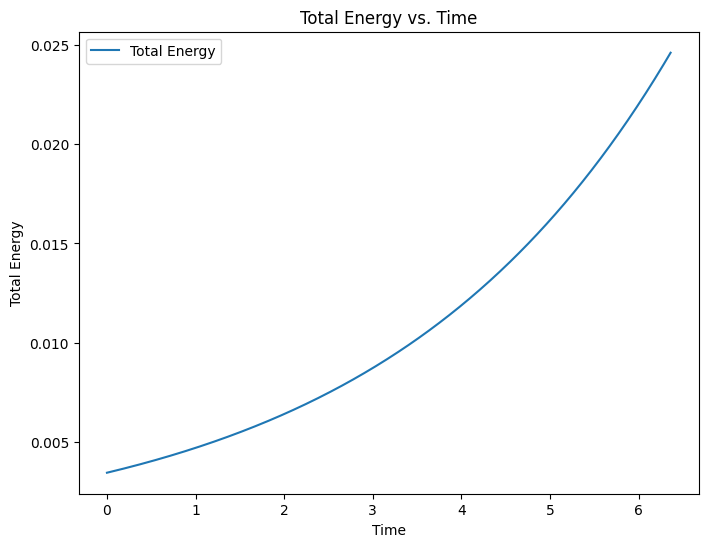

In [ ]:
# Your plot of energy vs time here
total_energy = 0.5 * m * velocity ** 2 + 0.5 * k * (position) ** 2

plt.figure(figsize = (8,6))
plt.plot(time , total_energy , label = 'Total Energy')
plt.title('Total Energy vs. Time')
plt.xlabel('Time')
plt.ylabel('Total Energy')
plt.legend()


# Euler-Cromer Solution

* Copy your calculate function below, but call it `euler_cromer_calculate`
* Adjust the code so that the $\omega_{i+1}$ is used to calculate $\theta_{i+1}$.
* Replot the position vs time.
* Replot total energy vs time.


**Questions**

Briefly answer the following questions in your wiki summary.
1. What is different about the Euler vs Euler-Cromer method?
1. Does the Euler-Cromer solution conserve energy?

In [ ]:
# your euler_cromer_calculate

def euler_cromer_calculate(time,position,velocity, k,m,dt):
  """
  description: calculates position and veloctiy using the Euler0Cromer method

  parameters:
  time = time array
  position = position array
  velocity = velocity array
  k = spring constant
  m = mass
  dt = time step
  xeq = equilibrium position

  return: time array , position array, velocity array
  """
  for i in range (1,len(time)):
    time[i] = time[i-1] + dt
    velocity[i] = velocity[i-1] + acceleration(k,m,position[i-1]) * dt
    position[i] = position [i-1] + velocity[i] * dt

  return time, position, velocity


In [ ]:
# copy your main function cell from above
# call euler_cromer_calculate instead of calculate
time_ec, position_ec, velocity_ec = initialize(x0,vx0,tmax,dt )
time_ec, position_ec, velocity_ec = euler_cromer_calculate(time_ec, position_ec, velocity_ec, k,m,dt)


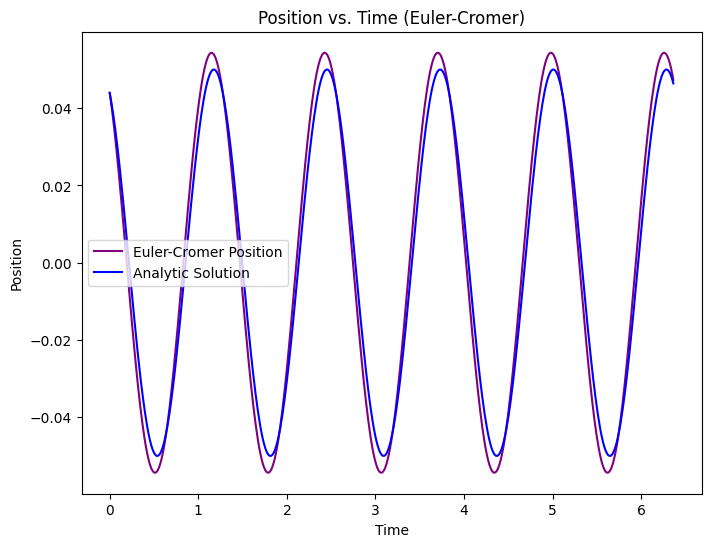

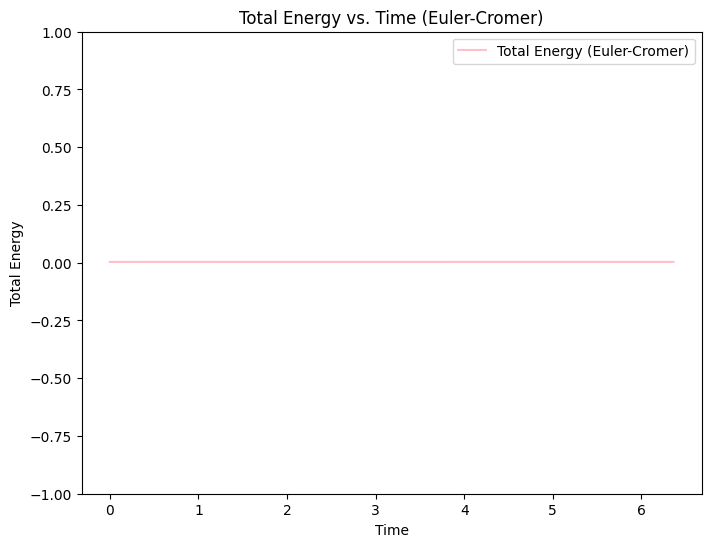

In [ ]:
# copy your total energy vs time plot from above
# but plot the output from the Euler-Cromer solution here
plt.figure(figsize=(8, 6))
plt.plot(time_ec, position_ec, label='Euler-Cromer Position', color='purple')
omega = np.sqrt(k/m)
analytical_solution = calculate_pos(A,omega,-0.5,time)
plt.plot(time, analytical_solution, 'b-', label = 'Analytic Solution')
plt.title('Position vs. Time (Euler-Cromer)')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()

# Plot total energy versus time for Euler-Cromer
total_energy_ec = 0.5 * m * velocity_ec**2 + 0.5 * k * (position_ec)**2
plt.figure(figsize=(8, 6))
plt.plot(time_ec, total_energy_ec, label='Total Energy (Euler-Cromer)', color='pink')
plt.title('Total Energy vs. Time (Euler-Cromer)')
plt.xlabel('Time')
plt.ylabel('Total Energy')
plt.ylim(-1,1)
plt.legend()

plt.show()